# Hitting and Cold Weather in Baseball

**A project by Nathan Ding (njd304@stern.nyu.edu) on the effects of temperature on major league batters**

**Spring 2016 Semester**


## Introduction

The Natural Gas Law (PV = nRT) tells us that as the temperature of a gas rises in a rigid container, the pressure of the said gas will steadily increase as well due to a rise in the  average speed of gas molecules. In essence, the amount of energy contained within the system rises as heat is nothing more than thermal (kenetic) energy. While the Natural Gas Law holds for gasses, a similar increase in molecular vibrations - and therefore energy - is seen in solid objects as well. When the temperature rises, the amount of energy contained within a solid increases. The purpose of this project is to examine the effects of temperatures on the game of baseball, with specific regard to the hitting aspect of the game. 

## Hitting in Baseball

The art of hitting a MLB fastball combines an incredible amount of luck, lightning-fast reflexes, and skill. Hitters often have less than half a second to determine whether to swing at a ball or not. However, when sharp contact is made with a fastball screaming towads the plate at over 90 miles/hour, the sheer velocity and energy the ball carries with it helps it fly off of the bat at an even faster speed. The higher the pitch velocity, the more energy a ball contains, and the faster its "exit velocity" (the speed of the ball when it is hit). This project looks to examine whether or no the extra energy provided by the ball's temperature plays a significant factor in MLB hitters' abilities to hit the ball harder. By analyzing the rates of extra base hits (doubles, triples, and home runs which generally require a ball to be hit much harder and further than a single) at different temperature ranges, I hope to discover a significant correlation between temperature and hitting rates. 

### Packages Used



In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

**Pandas:** I imported pandas for use in reading my many .csv files and because the pandas module contains dataframes, which are much easier to use for data analysis than lists or dictionaries. 

**matplotlib.pyplot:** matplotlib.pyplot was used to create graphs and scatterplots of the data, and because the creation of figure and axis objects with matplotlib allows for easier manipulation of the physical aspects of a plot. 

**statsmodels.formula.api** was imported for the linear regression models at the end of this project. 

## Data Inputting

The data for this project was collected from baseball-reference.com's [Play Index](http://www.baseball-reference.com/play-index/), which allows users to sort and search for baseball games based on a multitude of criteria including team, player, weather conditions (temperature, wind speed/direction, and precipitation). Unfortunately, the play index only allows registered users to access and export a list of 300 games at a time. As a result, I had to download 33 seperate CSV files from the website to gather all 9-inning MLB games from the 2013 - 2015 seasons. The total number of games used in this data set was 8805. Because the filenames were all **'C:/Users/Nathan/Desktop/BaseBall/data/play-index_game_finder.cgi_ajax_result_table.csv'** followed by a number in parenthesis, I was able to use a for loop to combine all the data into one large dataframe. 

**An online version of these files are avaliable at [this link](https://github.com/njd304/Data-Bootcamp)**


In [16]:
#import data from CSVs
total = pd.read_csv('C:/Users/Nathan/Desktop/BaseBall/data/play-index_game_finder.cgi_ajax_result_table.csv')
for i in range(1,32): 
    file = 'C:/Users/Nathan/Desktop/Baseball/data/play-index_game_finder.cgi_ajax_result_table (' + str(i) +').csv'
    data = pd.read_csv(file)
    total = total.append(data)
    
total.head(30)

,Rk,Date,Tm,Opp,Rslt,PA,AB,R,H,2B,...,aLI,LOB,#,Attendance,GmLen,Temp,WindDir,WindSpd,Prec,Sky
0,1,2015-10-04,ARI,HOU,W 5-3,39,36,5,11,4,...,.987,10,15,24788,199,75,NaN,0,none,dome
1,2,2015-10-04 (1),ATL,STL,W 6-0,32,31,6,8,1,...,.410,2,13,NaN,134,67,rtol,15,NaN,overcast
2,3,2015-10-04 (2),ATL,STL,W 2-0,32,31,2,11,2,...,.915,6,12,31441,139,69,fromcf,11,NaN,overcast
3,4,2015-10-04,BAL,NYY,W 9-4,41,35,9,12,4,...,.549,8,10,33224,219,56,fromcf,8,NaN,overcast
4,5,2015-10-04,CHW,DET,L 0-6,32,30,0,3,1,...,.896,5,9,19800,165,56,ltor,12,NaN,overcast
5,6,2015-10-04,CLE,BOS,W 3-1,33,32,3,10,3,...,.753,6,9,17844,166,67,rtol,11,NaN,cloudy
6,7,2015-10-04,LAD,SDP,W 6-3,39,32,6,9,0,...,.596,9,23,42863,182,67,tocf,7,NaN,NaN
7,8,2015-10-04,MIL,CHC,L 1-3,31,28,1,3,2,...,1.119,3,15,32959,164,68,NaN,0,none,dome
8,9,2015-10-04,MIN,KCR,L 1-6,40,34,1,7,0,...,.854,12,9,24108,191,55,fromlf,3,NaN,cloudy
9,10,2015-10-04,NYM,WSN,W 1-0,30,27,1,5,2,...,1.073,5,17,41631,154,62,fromcf,21,NaN,sunny


## Data Cleansing

Because of the nature of the baseball-reference.com Play Index, there were some repeated games in the CSV files, and after every 25 games the headers would reappear. In order to clean the data, I removed each row of data where the 'Temp' value was 'Temp', because those rows were the header rows. I removed the unnecessary columns by iterating through the column values with a for loop and removing the ones that were "unimportant" (as opposed to the "important" ones in the important list) Finally, I removed the duplicate entries from the datafram using the df.drop_duplicates() method.

In [17]:
#Clean data to remove duplicates, unwanted stats
important = ['Date','H', '2B', '3B', 'HR', 'Temp']
for i in total:
    if i in important:
        continue
    del total[i]
#remove headers
total = total[total.Temp != 'Temp']
#remove duplicates
total = total.drop_duplicates()
#remove date -> cannot remove before because there are items that are identical except for date
del total['Date']
# remove date from important list
important.remove('Date')
total.head(5)

,H,2B,3B,HR,Temp
0,11,4,0,2,75
1,8,1,0,3,67
2,11,2,0,0,69
3,12,4,0,2,56
4,3,1,1,0,56


In [18]:
#change dtypes to int
total[['Temp', 'HR', '2B', '3B', 'H']] = total[['Temp', 'HR', '2B', '3B', 'H']].astype(int)
total.dtypes

H       int32
2B      int32
3B      int32
HR      int32
Temp    int32
dtype: object

In [19]:
#calculte extra-base-hits (XBH) (doubles, triples, home runs) for each game
#by creating a new column in the dataframe
total['XBH'] = total['2B'] + total['3B'] + total['HR']

#append XBH to important list
important.append('XBH')

In [20]:
#seperate data into new dataframes based on temperature ranges
#below 50
minus50 = total[total.Temp <= 50]
#50-60
t50 = total[total.Temp <= 60]
t50 = t50[t50.Temp > 50]
#60-70
t60 = total[total.Temp <= 70] 
t60 = t60[t60.Temp > 60]
#70-80
t70 = total[total.Temp <= 80] 
t70 = t70[t70.Temp > 70]
#80-90
t80 = total[total.Temp <= 90] 
t80 = t80[t80.Temp > 80]
#90-100
t90 = total[total.Temp <= 100] 
t90 = t90[t90.Temp > 90]
#over 100
over100= total[total.Temp > 100]
minus50.head(5)

,H,2B,3B,HR,Temp,XBH
19,8,3,0,0,48,3
20,8,3,0,2,49,5
105,7,2,0,0,48,2
12,8,1,0,1,46,2
106,14,1,0,3,47,4


In [21]:
#New dataframe organized by temperature
rangelist = [minus50, t60, t70, t80, t90, over100]
data_by_temp = pd.DataFrame()
data_by_temp['ranges']=['<50', "60's","70's","80's","90's",">100"]
#calculate per-game averages by temperature range
for i in important:
    data_by_temp[i+'/Game'] = [sum(x[i])/len(x) for x in rangelist]
#set index to temperature ranges
data_by_temp = data_by_temp.set_index('ranges')
data_by_temp.head(10)

,H/Game,2B/Game,3B/Game,HR/Game,Temp/Game,XBH/Game
ranges,,,,,,
<50,8.102041,1.624490,0.155102,0.734694,44.697959,2.514286
60's,8.235924,1.624011,0.201024,0.919497,66.157748,2.744532
70's,8.485536,1.688315,0.206466,0.959444,75.144356,2.854226
80's,8.748431,1.704507,0.167712,1.095836,84.573303,2.968055
90's,8.890052,1.777487,0.172775,1.026178,93.963351,2.976440
>100,9.272727,2.393939,0.212121,0.909091,102.666667,3.515152


## Data Plots

I made a couple bar graphs to compare average extra base hits per game by temperature range and to compare home runs per game as well because home runs are the furthest hit balls, and in theory should see the largest temperature impact if there is in fact a measureable impact on the baseballs. I then made a couple of scatterplots to compare the complete data results, and look for some sort of trendline. Unfortunately, because of the limited amount of possible results, the scatterplots did not come out as I had hoped.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

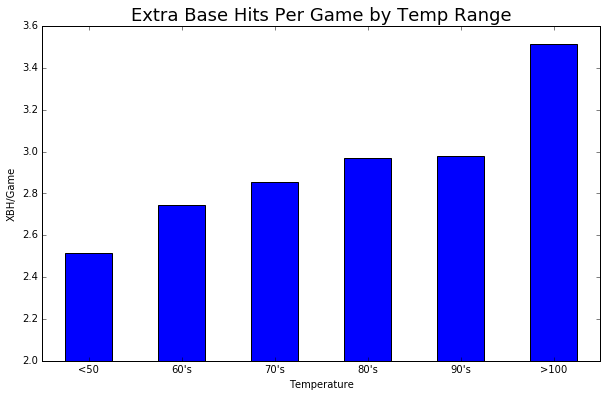

In [22]:
#plots
fig, ax=plt.subplots()
data_by_temp['XBH/Game'].plot(ax=ax,kind='bar',color='blue', figsize=(10,6))
ax.set_title("Extra Base Hits Per Game by Temp Range", fontsize=18)
ax.set_ylim(2,3.6)
ax.set_ylabel("XBH/Game")
ax.set_xlabel("Temperature")
plt.xticks(rotation='horizontal')


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

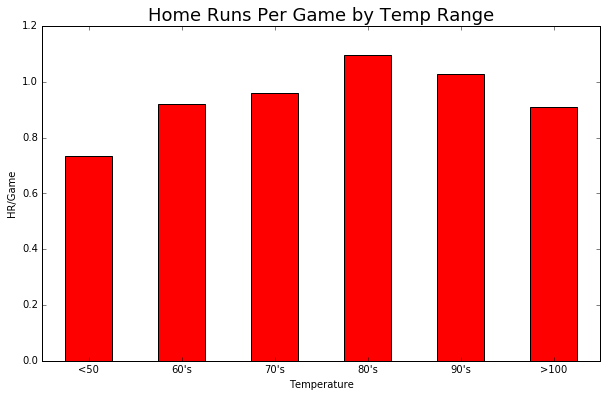

In [23]:
#plots
fig, ax=plt.subplots()
data_by_temp['HR/Game'].plot(ax=ax,kind='bar',color='red', figsize=(10,6))
ax.set_title("Home Runs Per Game by Temp Range", fontsize=18)
ax.set_ylim(0,1.2)
ax.set_ylabel("HR/Game")
ax.set_xlabel("Temperature")
plt.xticks(rotation='horizontal')

(-1, 14)

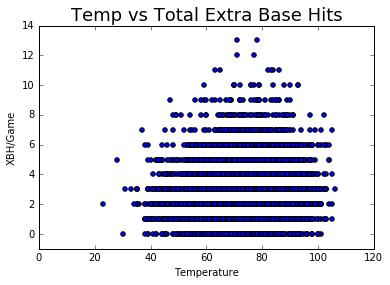

In [24]:
#scatterplot
x = data_by_temp.index
fig, ax = plt.subplots()
ax.scatter(total['Temp'],total['XBH'])
ax.set_title("Temp vs Total Extra Base Hits", fontsize = 18)
ax.set_ylabel("XBH/Game")
ax.set_xlabel("Temperature")
plt.xticks(rotation='horizontal')
ax.set_ylim(-1,14)

(-1, 10)

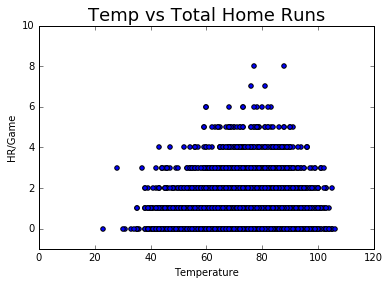

In [25]:
#scatterplot
x = data_by_temp.index
fig, ax = plt.subplots()
ax.scatter(total['Temp'],total['HR'])
ax.set_title("Temp vs Total Home Runs", fontsize = 18)
ax.set_ylabel("HR/Game")
ax.set_xlabel("Temperature")
plt.xticks(rotation='horizontal')
ax.set_ylim(-1,10)

## Statistical Analysis

I ran a linear regression of the total extra base hits and teperatures for the master data set to see if there was a correletion. Although the r-squared value is so small, due to the fact that there are a limited amount of possible home runs per game (realistically) and the sample size is so large (see the scatterplots above), the regressions for extra base hits and temperature, as well as home runs and temperature, both show a miniscule correlation between temperature and hits. Because the slope values are so small (a 100 degree increase in temperature correleates to a 1 extra base hit increase and a .7 home run increase), there is basically no correlation. After all, a 100 degree increase is basically the entire range of this project.

In [26]:
regression= smf.ols(formula="total['XBH'] ~ total['Temp']", data = total).fit()
regression.params
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total['XBH']   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     42.38
Date:                Fri, 13 May 2016   Prob (F-statistic):           7.91e-11
Time:                        01:21:14   Log-Likelihood:                -17737.
No. Observations:                8805   AIC:                         3.548e+04
Df Residuals:                    8803   BIC:                         3.549e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         1.9700      0.134     14.693      0.000         1.707     2.233
total['Temp']     0.0118      0.002      6.510      0.000         0.008     0.015
==============================================================================
Omnibus:                      827.584   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1143.574
Skew:                           0.763   Prob(JB):                    4.74e-249
Kurtosis:                       3.888   Cond. No.                         514.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
regression2 = smf.ols(formula="total['HR'] ~ total['Temp']", data = total).fit()
regression2.params
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total['HR']   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     49.58
Date:                Fri, 13 May 2016   Prob (F-statistic):           2.05e-12
Time:                        01:21:14   Log-Likelihood:                -12825.
No. Observations:                8805   AIC:                         2.565e+04
Df Residuals:                    8803   BIC:                         2.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.4296      0.077      5.597      0.000         0.279     0.580
total['Temp']     0.0073      0.001      7.041      0.000         0.005     0.009
==============================================================================
Omnibus:                     1764.090   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3494.345
Skew:                           1.207   Prob(JB):                         0.00
Kurtosis:                       4.923   Cond. No.                         514.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

Ultimately, the results of this project were mixed and more negative than positive. Though the bar graph on average extra base hits per game showed a steady increase as temperature increased, the same was not true for average home runs per game. Furthermore, the regression analysis showed a tiny relationship between the variables. Although the results were statistically significant, this was due more to the huge sample size than the existience of a correlation. Ultimately, the data collected failed to really suggest that temperature has a huge impact on the ability of MLB hitters to hit a baseball with power. I had been hoping to discover a more impactful effect of temmperature on the ability of hitters to hit the ball far. A possible expansion upon this experiment to go more in-depth perhaps could have been a team-by-team (or stadium by stadium) breakdown of how each team/stadium performed under diffrerent temperature conditons. For example, it is likely that the Tampa Bay Rays or the Los Angeles Angels, from the southern part of the US and unaccustomed to playing in colder temperatures, may have been more affected than a team like the Boston Red Sox who regularly play in colder games, especially in the spring and fall months. 

## Sources

Data from this project was collected from the baseball-reference.com Play Index, which can be found at http://www.baseball-reference.com/play-index/. In order to unlock the full potential of the Play Index, a paid membership is required.